In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading the tables!!

In [2]:
df_master = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_clean/df_master.csv')
df_appearances = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_raw/dataset/appearances.csv')

In [3]:
df_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706806 entries, 0 to 1706805
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB


In [4]:
df_appearances.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [5]:
# Group by player_id and aggregate key stats!!

df_perf = df_appearances.groupby('player_id', as_index=False).agg({
    'minutes_played': 'sum',
    'goals': 'sum',
    'assists': 'sum',
    'yellow_cards': 'sum',
    'red_cards': 'sum'
})

# Calculate per-90 stats safely
df_perf = df_perf[df_perf['minutes_played'] > 0]  # remove players with 0 minutes
df_perf['goals_per90'] = df_perf['goals'] / (df_perf['minutes_played'] / 90)
df_perf['assists_per90'] = df_perf['assists'] / (df_perf['minutes_played'] / 90)

# Replace NaN or inf values with 0
df_perf.replace([float('inf'), -float('inf')], 0, inplace=True)
df_perf.fillna(0, inplace=True)

In [6]:
df_perf.head()

,player_id,minutes_played,goals,assists,yellow_cards,red_cards,goals_per90,assists_per90
0,10,8808,48,25,19,0,0.490463,0.255450
1,26,13508,0,0,4,2,0.000000,0.000000
2,65,8788,38,13,11,1,0.389167,0.133136
3,77,307,0,0,0,0,0.000000,0.000000
4,80,1080,0,0,0,0,0.000000,0.000000


In [7]:
df_perf.columns.tolist()

['player_id',
 'minutes_played',
 'goals',
 'assists',
 'yellow_cards',
 'red_cards',
 'goals_per90',
 'assists_per90']

# Combining our 'df_master' table and newly accuried 'df_perf' table with player_id as our primary key!!

In [8]:
df_whole = pd.merge(df_master, df_perf, how = 'left', left_on = 'player_id', right_on = 'player_id')


df_whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28462 non-null  int64  
 1   name                                  28462 non-null  object 
 2   last_season                           28462 non-null  int64  
 3   current_club_id_x                     28462 non-null  int64  
 4   player_code                           28462 non-null  object 
 5   country_of_citizenship                28106 non-null  object 
 6   sub_position                          28369 non-null  object 
 7   position                              28462 non-null  object 
 8   foot                                  26724 non-null  object 
 9   height_in_cm                          26959 non-null  float64
 10  contract_expiration_date              19624 non-null  object 
 11  agent_name     

In [9]:
df_whole.head()

,player_id,name,last_season,current_club_id_x,player_code,country_of_citizenship,sub_position,position,foot,height_in_cm,...,age,market_value_in_eur_y,current_club_id_y,minutes_played,goals,assists,yellow_cards,red_cards,goals_per90,assists_per90
0,1606,Morten Rasmussen,2012,2414,morten-rasmussen,Denmark,Centre-Back,Defender,right,188.0,...,40.0,50000,2414,2989.0,1.0,0.0,11.0,0.0,0.030110,0.000000
1,1784,René Adler,2018,39,rene-adler,Germany,Goalkeeper,Goalkeeper,NaN,NaN,...,40.0,500000,39,12858.0,0.0,3.0,12.0,1.0,0.000000,0.020999
2,2857,Eldin Jakupovic,2022,29,eldin-jakupovic,Switzerland,Goalkeeper,Goalkeeper,right,191.0,...,40.0,100000,29,2837.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3256,Roberto Hilbert,2016,15,roberto-hilbert,Germany,Right-Back,Defender,right,182.0,...,40.0,100000,15,8938.0,4.0,10.0,25.0,0.0,0.040277,0.100694
4,3269,Calvin Zola,2013,370,calvin-zola,DR Congo,Centre-Forward,Attack,right,191.0,...,40.0,300000,370,834.0,3.0,4.0,1.0,0.0,0.323741,0.431655


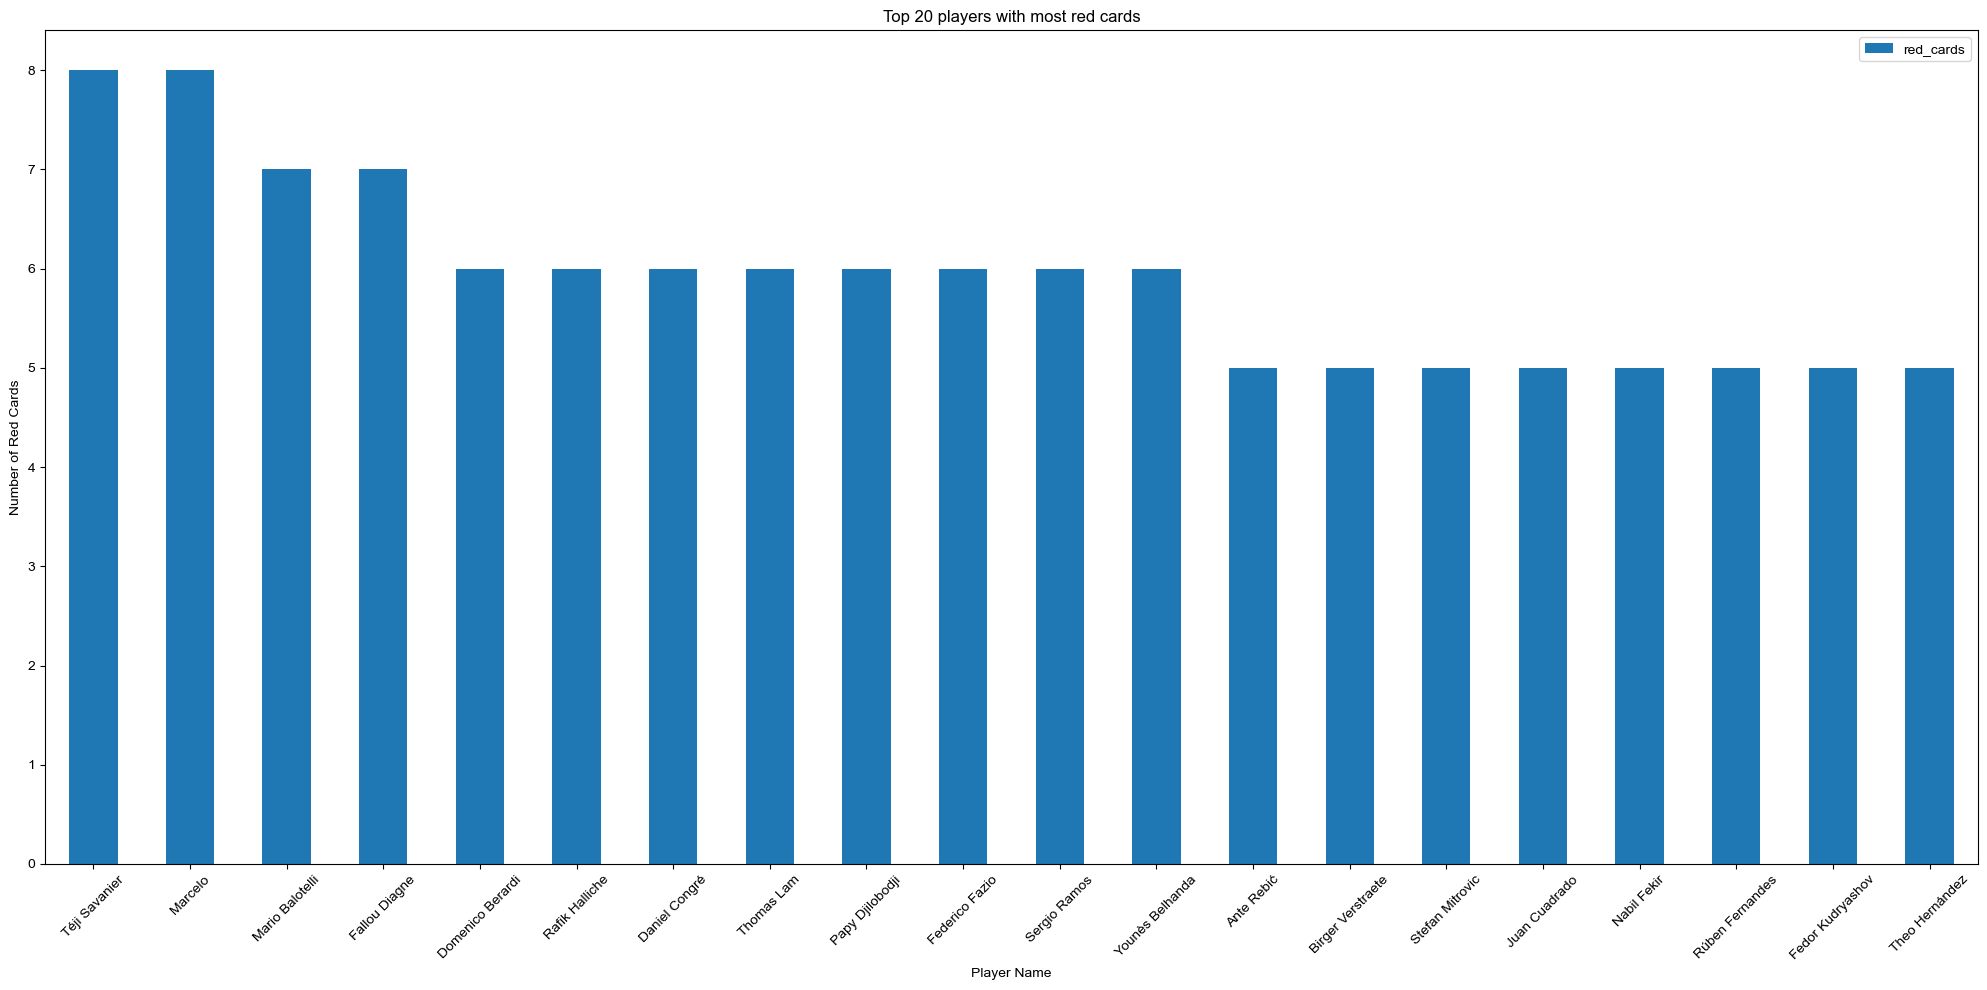

In [10]:
# Finding who got the most red cards in our dataset!!

df_whole.pivot_table(index = 'name', values = 'red_cards', aggfunc = 'sum').sort_values(by = 'red_cards', ascending = False).head(20).plot(kind = 'bar', figsize = (20, 10))
sns.set_style('dark')
plt.xticks(rotation = 45)
plt.title('Top 20 players with most red cards')
plt.ylabel('Number of Red Cards')
plt.xlabel('Player Name')
plt.tight_layout()
plt.show()

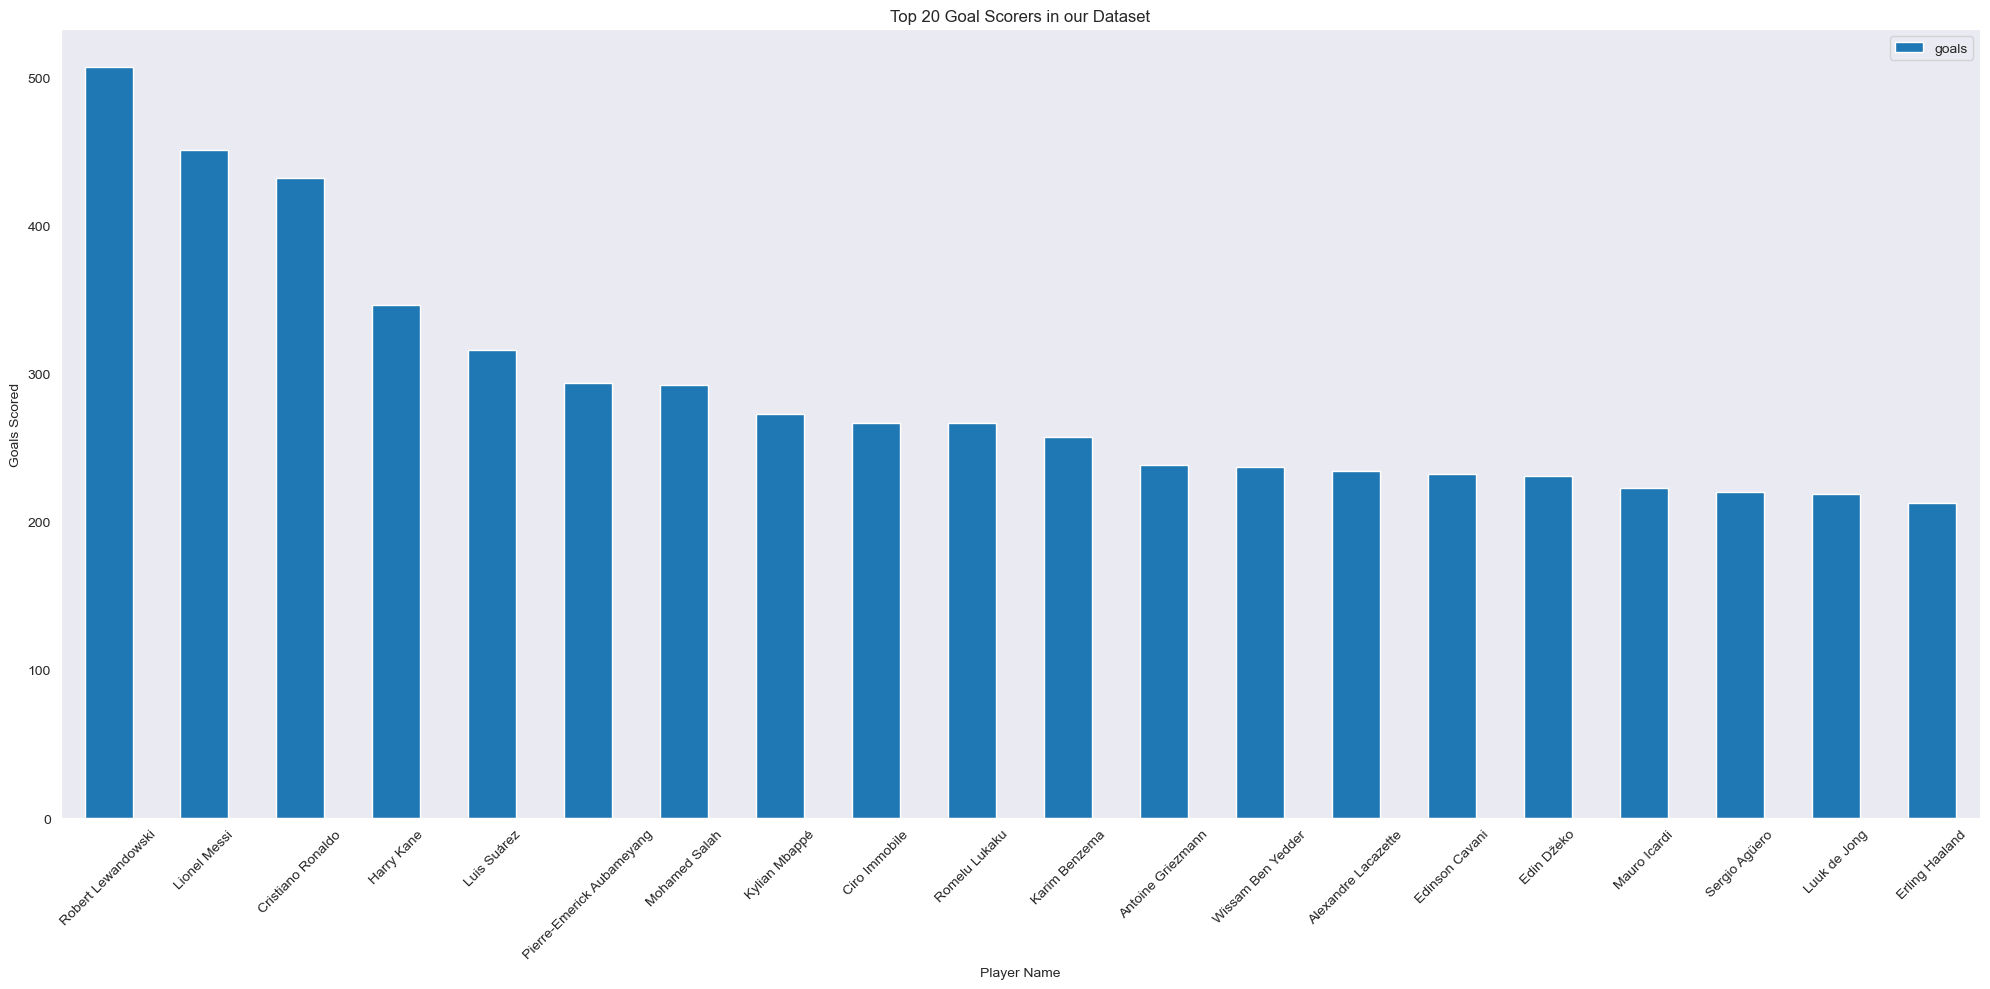

In [11]:
# Finding who got the most goals in our dataset!!

df_whole.pivot_table(index = 'name', values = 'goals', aggfunc = 'sum').sort_values(by = 'goals', ascending = False).head(20).plot(kind = 'bar', figsize = (20, 10))
plt.xticks(rotation = 45)
plt.title('Top 20 Goal Scorers in our Dataset')
plt.xlabel('Player Name')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.show()

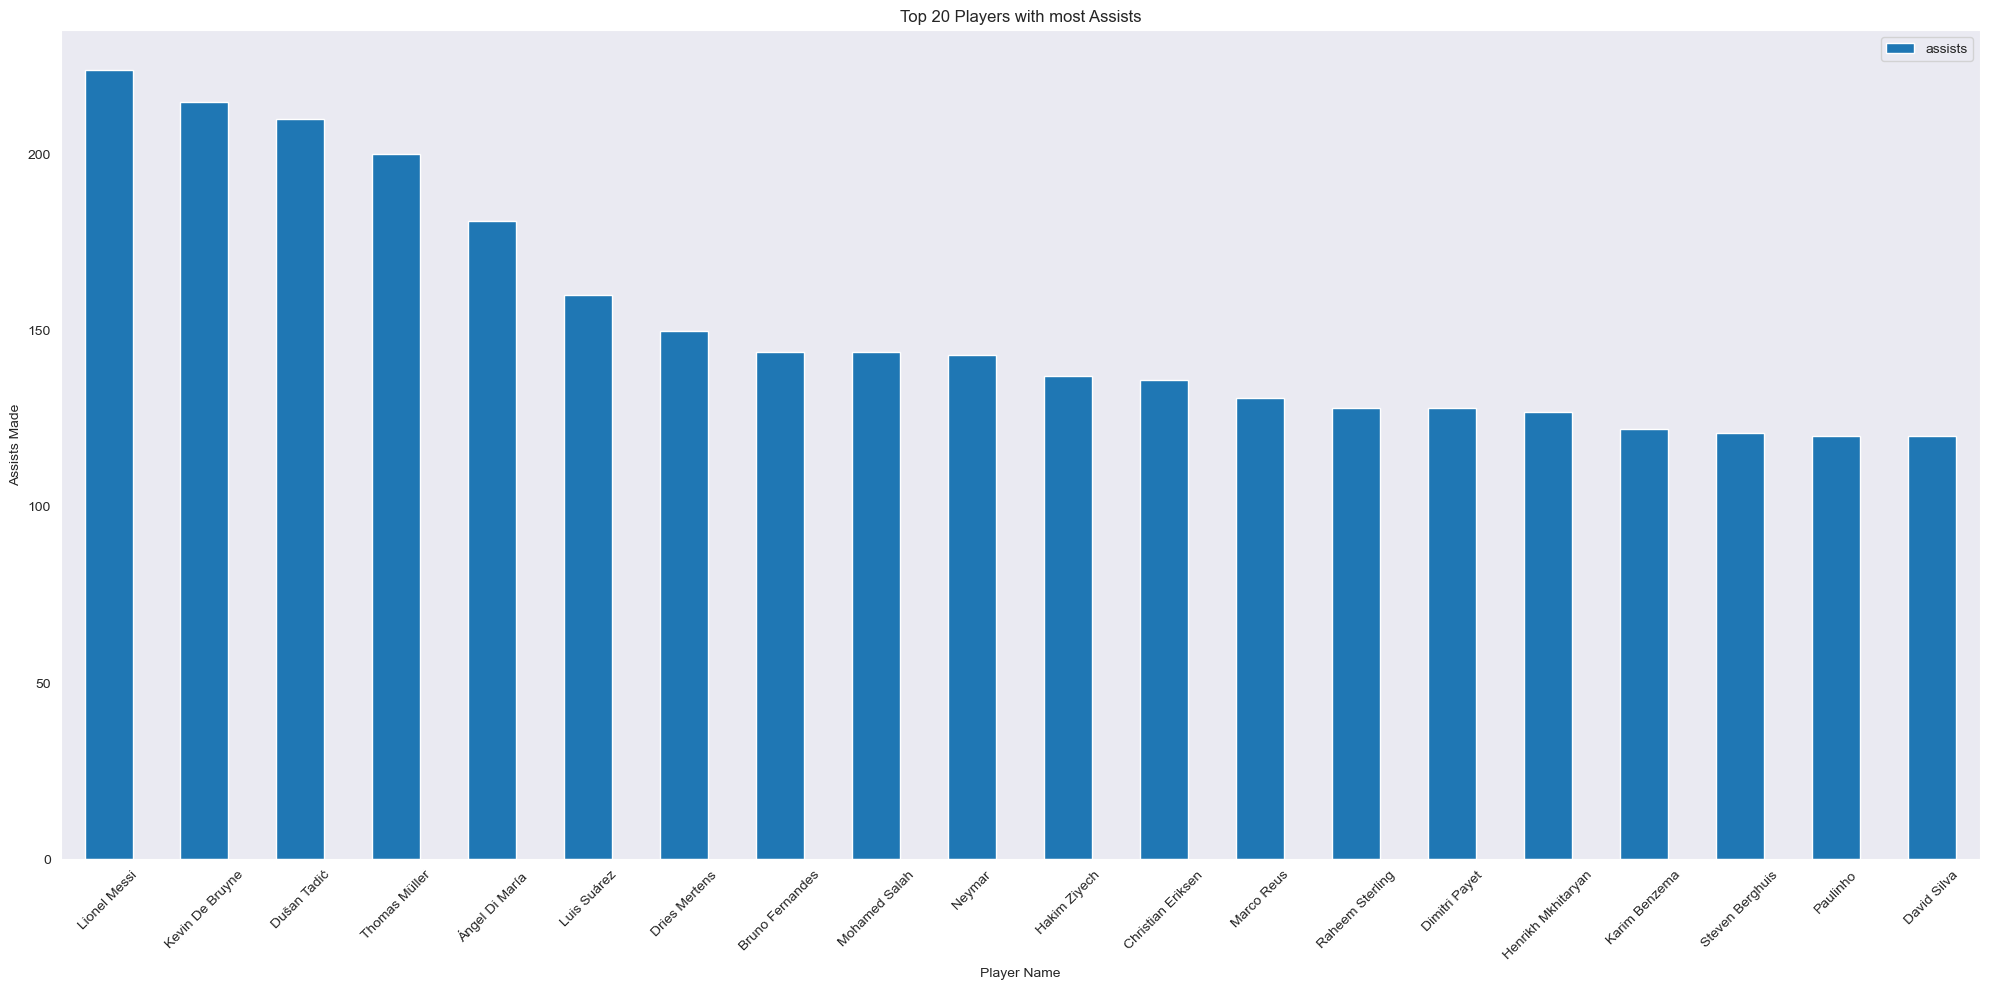

In [12]:
# Finding who made the most assists in our dataaset!!

df_whole.pivot_table(index = 'name', values = 'assists', aggfunc = 'sum').sort_values(by ='assists', ascending = False).head(20).plot(kind = 'bar', figsize = (20, 10))
plt.xlabel('Player Name')
plt.ylabel('Assists Made')
plt.title('Top 20 Players with most Assists')
plt.xticks(rotation = 45)
plt.tight_layout()

In [13]:
df_whole.to_csv('/Users/kishohars/Projects/football_valuation_project/data_clean/df_whole.csv', index = False)